## 理论上，RNN在训练中会记忆很久之前的信息，但是由于梯度消失问题，实际上它是不可能学到这种长期依赖的。网络最终会变得无法训练，故有了LSTM
## 它保存信息以便后面使用，从而防止较早期的信号在处理过程中逐渐消失，会带着这个信息在时间线上任意移动。

## LSTM是在RNN的基础上加了一个携带轨道
c_t表示t时刻携带的值（信息）
Uo Wo Vo为三个的权重
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
## 计算下一个c_t涉及到的变量，三个变换用i、f、k表示
i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
## 对 i_t、f_t 和 k_t 进行组合，可以得到新的携带状态（下一个 c_t）。
c_t+1 = i_t * k_t + c_t * f_t

## 只需要记住 LSTM 单元的作用：允许过去的信息稍后重新进入，从而解决梯度消失问题。

## 使用 LSTM 层来创建一个模型，然后在 IMDB 数据上训练模型

In [12]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# 加载前10000个最常见的特征词，loaddata时用
max_features = 10000
maxlen = 500
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 32ms/step - loss: 0.4995 - acc: 0.7538 - val_loss: 0.3238 - val_acc: 0.8718
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2863 - acc: 0.8880 - val_loss: 0.3188 - val_acc: 0.8650
Epoch 3/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2296 - acc: 0.9133 - val_loss: 0.3110 - val_acc: 0.8704
Epoch 4/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1958 - acc: 0.9280 - val_loss: 0.2972 - val_acc: 0.8764
Epoch 5/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1774 - acc: 0.9360 - val_loss: 0.2923 - val_acc: 0.8830
Epoch 6/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1593 - acc: 0.9427 - val_loss: 0.3483 - val_acc: 0.8534
Epoch 7/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1439 - acc: 0.9487 - val_loss: 0.3034 - val_acc: 0.8818
Epoch 8/10
157/157 [==============================] - 5s 30ms/step - 

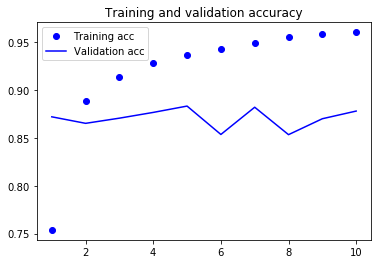

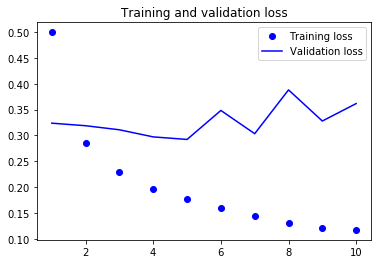

In [13]:
# 绘制训练 & 验证的损失值和准确率
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
dict(zip(history.history['val_acc'], history.history['val_loss']))

{0.8718000054359436: 0.3237561881542206,
 0.8650000095367432: 0.31883299350738525,
 0.8704000115394592: 0.31095701456069946,
 0.8763999938964844: 0.2972401976585388,
 0.8830000162124634: 0.29232004284858704,
 0.8533999919891357: 0.3483395576477051,
 0.8817999958992004: 0.30342528223991394,
 0.8532000184059143: 0.38807493448257446,
 0.8697999715805054: 0.32792264223098755,
 0.8777999877929688: 0.3616269826889038}